**Section I: Import the data**

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

In [3]:
mtcars = pd.read_csv("../../assets/datasets/mtcars.csv")

**Section II: Format the Data**

Convert to a Pandas Dataframe for our analysis

In [4]:
df = pd.DataFrame(mtcars)
df.head()

Car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

Loop through Cars List and Convert to Numeric. **HINT:** Reference the lesson for help with this!

In [5]:
def name_to_numeric(x):
    x = x.split()
    if x[0]=='Mazda':
        return 1
    if x[0]=='Datsun':
        return 2
    if x[0]=='Hornet':
        return 3
    if x[0]=='Valiant':
        return 4
    if x[0]=='Duster':
        return 5
    if x[0]=='Merc':
        return 6
    if x[0]=='Cadillac':
        return 7
    if x[0]=='Lincoln':
        return 8
    if x[0]=='Chrysler':
        return 9
    if x[0]=='Fiat':
        return 10
    if x[0]=='Honda':
        return 11
    if x[0]=='Toyota':
        return 12
    if x[0]=='Dodge':
        return 13
    if x[0]=='AMC':
        return 14
    if x[0]=='Camaro':
        return 15
    if x[0]=='Pontiac':
        return 16
    if x[0]=='Porsche':
        return 17
    if x[0]=='Lotus':
        return 18
    if x[0]=='Ford':
        return 19
    if x[0]=='Ferrari':
        return 20
    if x[0]=='Maserati':
        return 21
    if x[0]=='Volvo':
        return 22
    
    

Apply your functions, and append the results to the dataframe

In [6]:
#df['Car_num'] = df['Car'].apply(name_to_numeric)
del df['Car']
df

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0   21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1   21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2   22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3   21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4   18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
5   18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1
6   14.3    8  360.0  245  3.21  3.570  15.84   0   0     3     4
7   24.4    4  146.7   62  3.69  3.190  20.00   1   0     4     2
8   22.8    4  140.8   95  3.92  3.150  22.90   1   0     4     2
9   19.2    6  167.6  123  3.92  3.440  18.30   1   0     4     4
10  17.8    6  167.6  123  3.92  3.440  18.90   1   0     4     4
11  16.4    8  275.8  180  3.07  4.070  17.40   0   0     3     3
12  17.3    8  275.8  180  3.07  3.730  17.60   0   0     3     3
13  15.2    8  275.8  180  3.07  3.780  18.00   0   0     3     3
14  10.4    8  472.0  205  2.93  5.250  17.98   0   0     3     4
15  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3     4
16  14.7    8  440.0  230  3.23  5.345  17.42   0   0     3     4
17  32.4    4   78.7   66  4.08  2.200  19.47   1   1     4     1
18  30.4    4   75.7   52  4.93  1.615  18.52   1   1     4     2
19  33.9    4   71.1   65  4.22  1.835  19.90   1   1     4     1
20  21.5    4  120.1   97  3.70  2.465  20.01   1   0     3     1
21  15.5    8  318.0  150  2.76  3.520  16.87   0   0     3     2
22  15.2    8  304.0  150  3.15  3.435  17.30   0   0     3     2
23  13.3    8  350.0  245  3.73  3.840  15.41   0   0     3     4
24  19.2    8  400.0  175  3.08  3.845  17.05   0   0     3     2
25  27.3    4   79.0   66  4.08  1.935  18.90   1   1     4     1
26  26.0    4  120.3   91  4.43  2.140  16.70   0   1     5     2
27  30.4    4   95.1  113  3.77  1.513  16.90   1   1     5     2
28  15.8    8  351.0  264  4.22  3.170  14.50   0   1     5     4
29  19.7    6  145.0  175  3.62  2.770  15.50   0   1     5     6
30  15.0    8  301.0  335  3.54  3.570  14.60   0   1     5     8
31  21.4    4  121.0  109  4.11  2.780  18.60   1   1     4     2

Plot the Data. **HINT** Be sure to examine the different variables and how the relate to each other

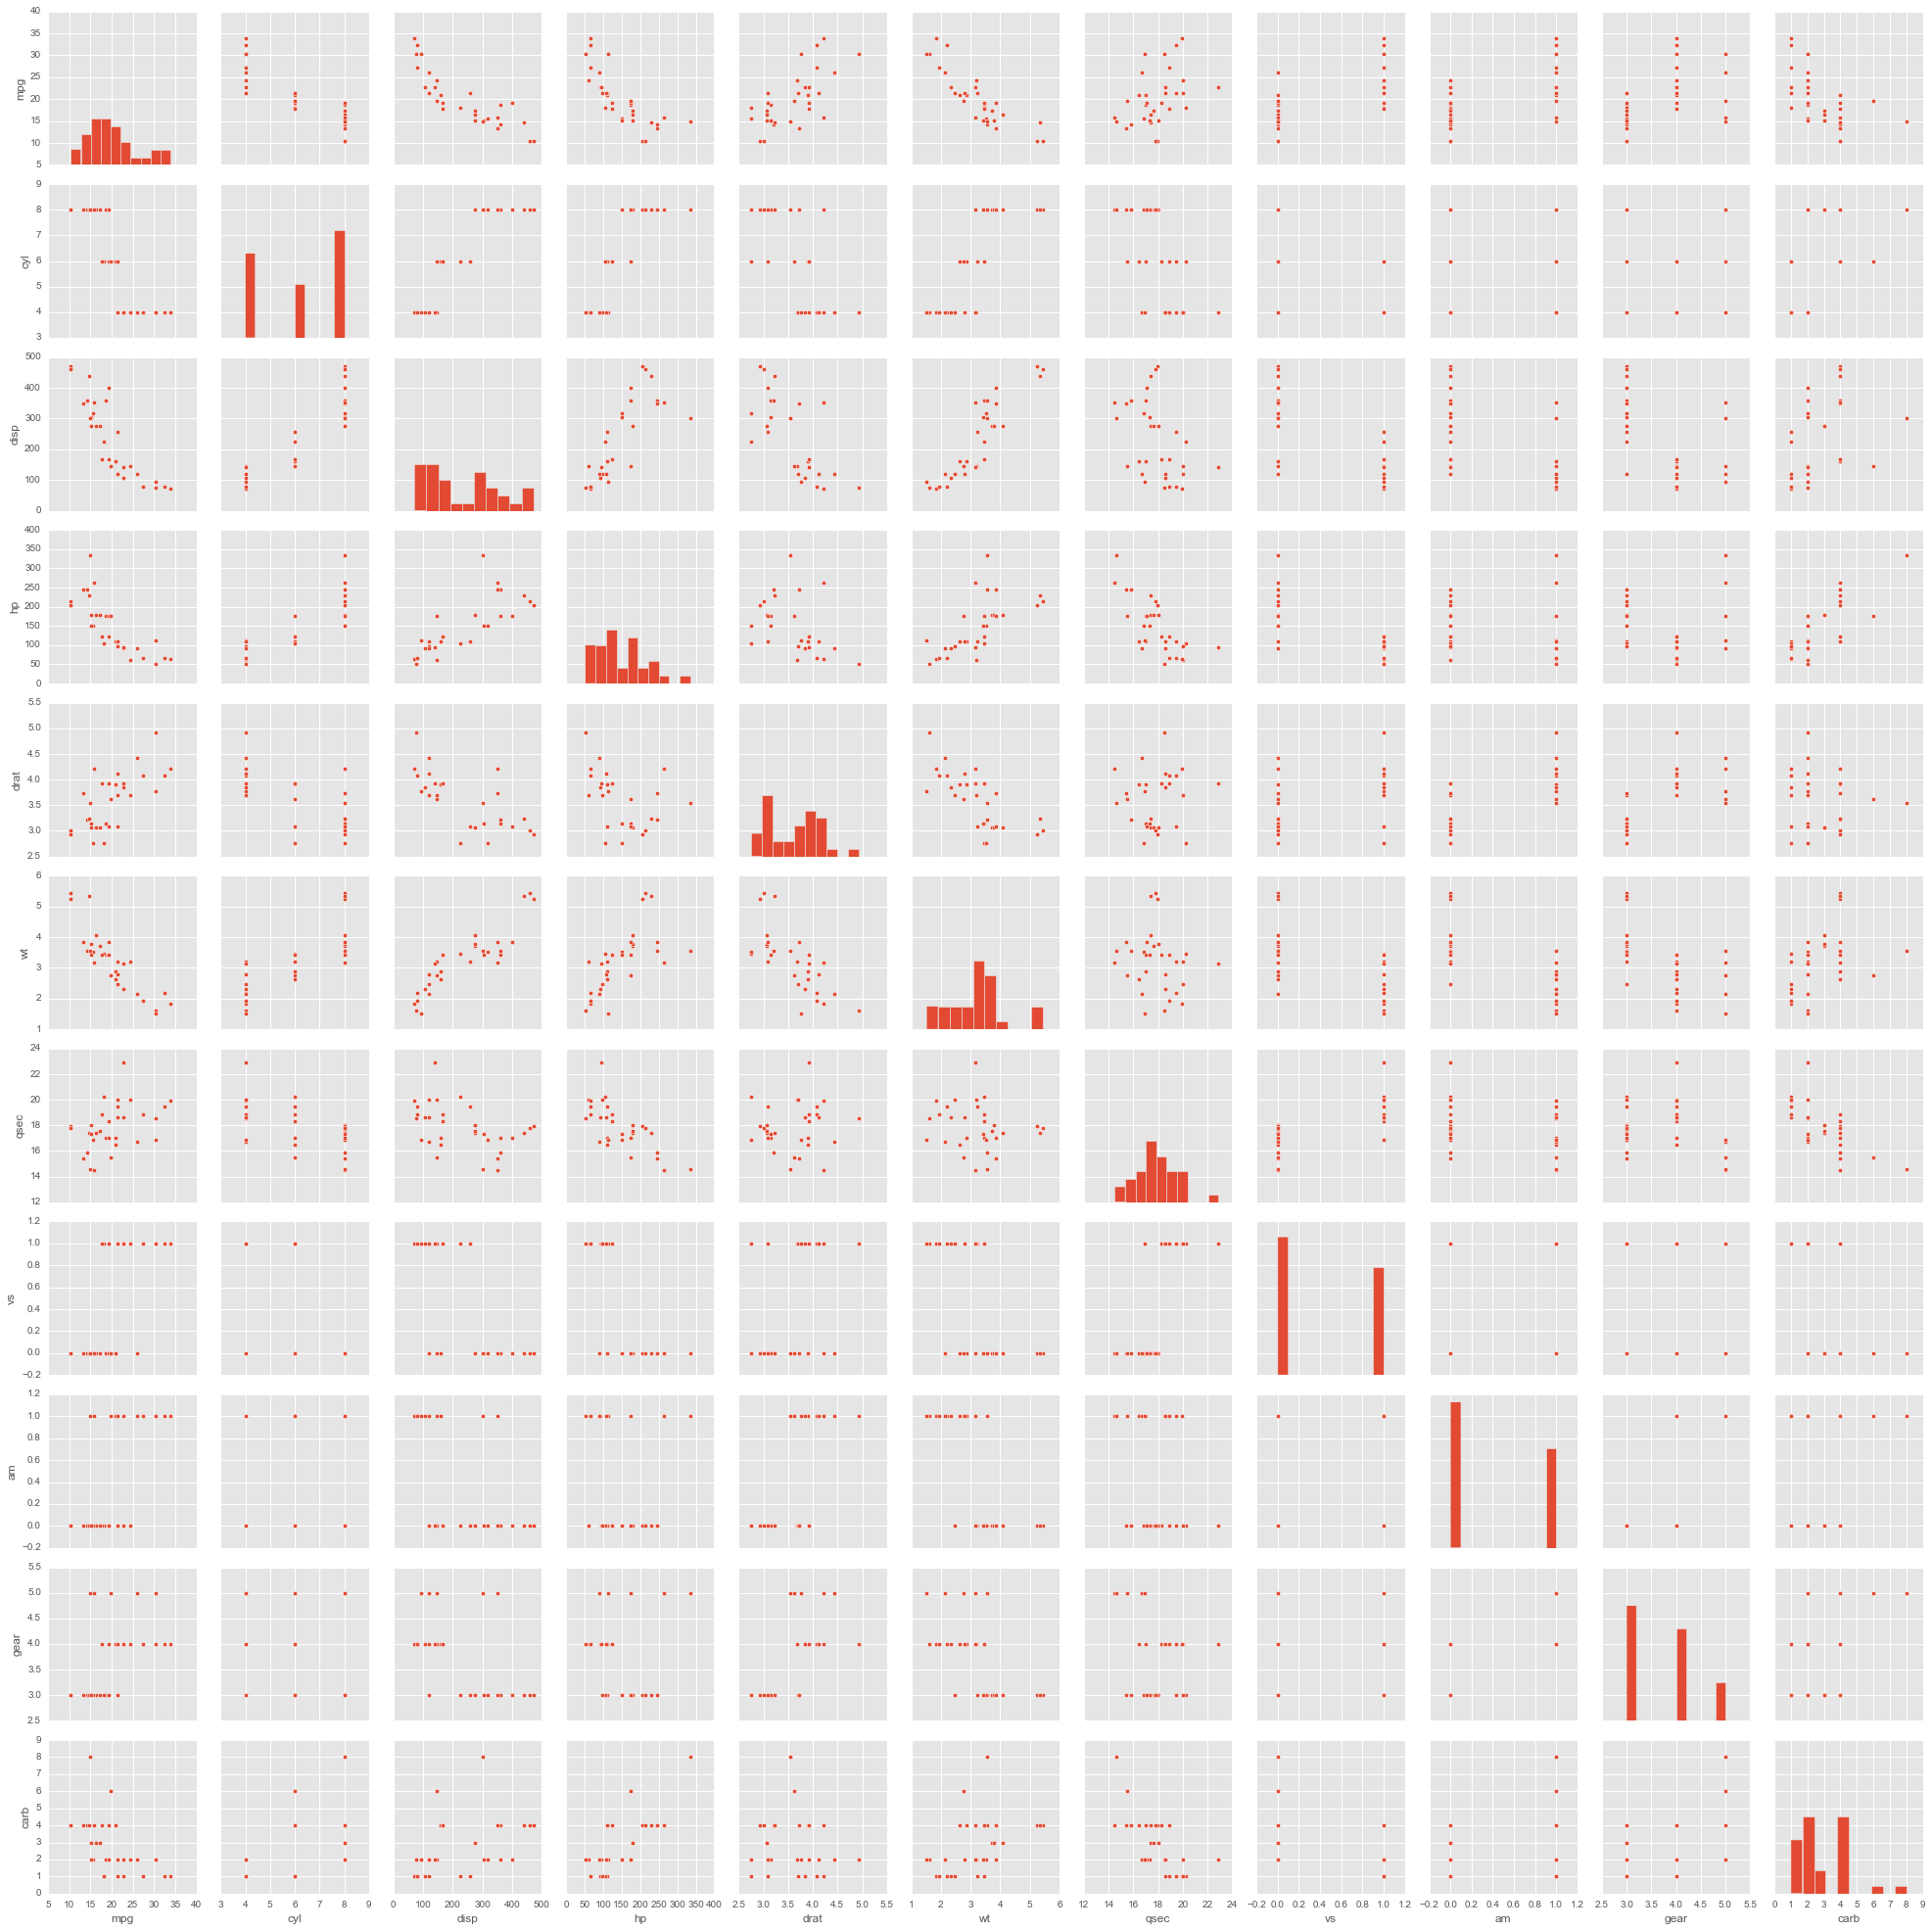

In [7]:
#df.plot(kind='scatter',x='gear',y='Car_num')
## Try this for multiple variable combinations
#df.plot(kind='SepalLength',x='_num',y='name_num')
sns.pairplot(df)

Convert to Matrix

In [8]:
sns.jointplot('mpg','cyl',data=df)

In [9]:
dn = df.as_matrix(columns=['mpg','cyl'])

**Section III: Cluster the data**

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

In [10]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels
print  
print centroids

[1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 0 0 0 1 2 2 2 1 0 0 0 2 1 2 1]

[[ 30.06666667   4.        ]
 [ 20.64285714   5.57142857]
 [ 14.45833333   8.        ]]


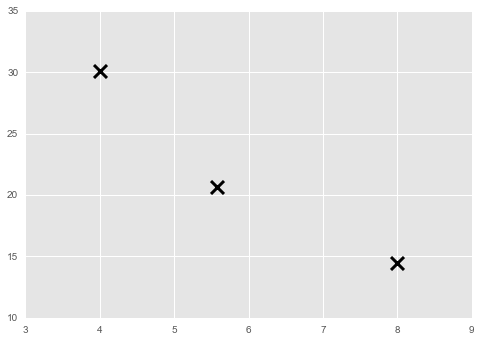

In [11]:
plt.scatter(centroids[:, 1],centroids[:, 0],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

Find the Silhoutte Score and plot

In [12]:
metrics.silhouette_score(dn, labels, metric='euclidean')
len(dn)

32